<a href="https://colab.research.google.com/github/sks20219091/Stock-price-prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf  # Importing yfinance

# Set up the Yahoo Finance API
yf.pdr_override()


In [11]:

start = '2010-01-01'
end = '2019-12-31'

# Fetch stock data for AAPL
df = pdr.get_data_yahoo('AAPL', start=start, end=end)
print(df.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.487534  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.498750  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.395378  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.383554  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.425995  447610800


In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327454,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702942,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676109,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095581,144114400


In [13]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383554,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425995,447610800


In [14]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


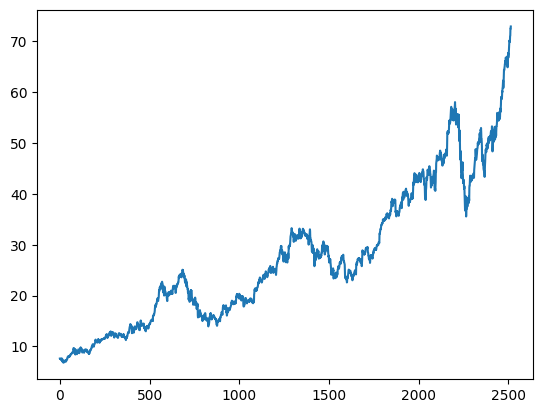

In [15]:
plt.plot(df.Close)

In [16]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [17]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

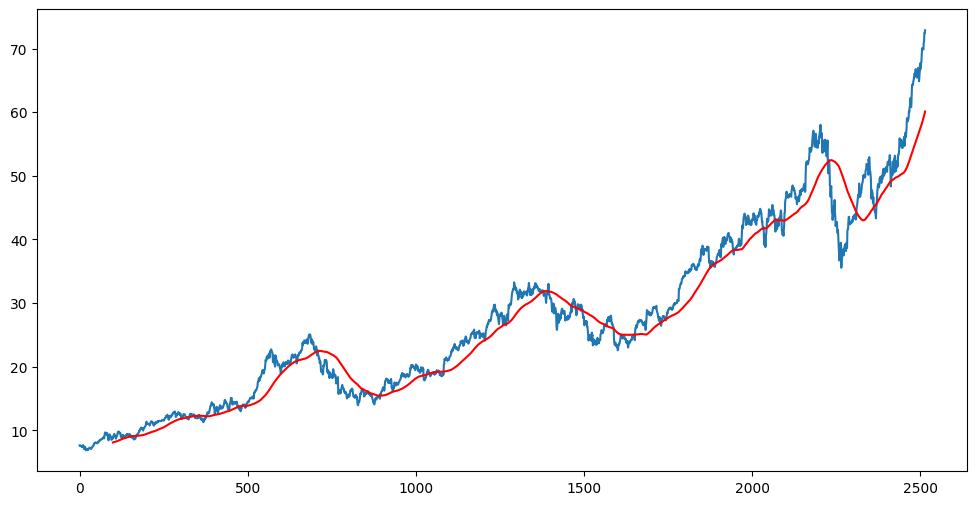

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [19]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

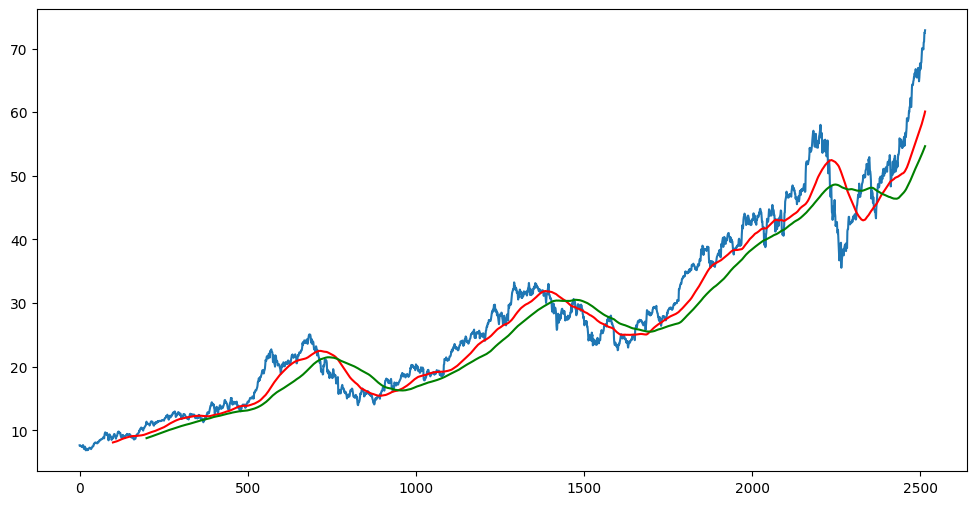

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [21]:
df.shape

(2515, 5)

# Splitting the data into Training & Testing

In [22]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [23]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [24]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


# Scaling Down the data to 0 to 1 using sklearn Library

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [27]:
data_training_array.shape

(1760, 1)

# Divide the Data into X_train  & Y_train

In [28]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [29]:
x_train.shape


(1660, 100, 1)

# Making ML Model

In [30]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units=50,activation = 'relu',return_sequences = True,
          input_shape = (x_train.shape[1],1)))

model.add(Dropout(0.2))


model.add(LSTM(units=60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units=80,activation = 'relu',return_sequences = True ))
model.add(Dropout(0.4))



model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [33]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 22s 323ms/step - loss: 0.0631
Epoch 2/50
52/52 [==============================] - 15s 298ms/step - loss: 0.0137
Epoch 3/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0119
Epoch 4/50
52/52 [==============================] - 16s 299ms/step - loss: 0.0102
Epoch 5/50
52/52 [==============================] - 17s 323ms/step - loss: 0.0091
Epoch 6/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0100
Epoch 7/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0088
Epoch 8/50
52/52 [==============================] - 16s 300ms/step - loss: 0.0082
Epoch 9/50
52/52 [==============================] - 17s 321ms/step - loss: 0.0081
Epoch 10/50
52/52 [==============================] - 17s 330ms/step - loss: 0.0075
Epoch 11/50
52/52 [==============================] - 15s 296ms/step - loss: 0.0071
Epoch 12/50
52/52 [==============================] - 16s 299ms/step - loss: 0.0074
Epoch 13/50
5

In [34]:
model.save('keras_model.h5')

In [35]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [36]:
data_training.tail()

,Close
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001
1759,29.190001


In [37]:
past_100_days = data_training.tail(100)

In [38]:
final_df = past_100_days.append(data_testing,ignore_index=True)

<ipython-input-38-4d8ac21bc040>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [39]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [41]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [42]:
input_data.shape

(855, 1)

In [45]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [49]:
#Converting them into NumPy array
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(755, 100, 1)
(755,)


# Making Prediction

In [48]:
y_predicted = model.predict(x_test)


24/24 [==============================] - 3s 81ms/step


In [50]:
y_predicted.shape


(755, 1)

In [51]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [52]:
y_predicted

array([[0.09382764],
       [0.09525153],
       [0.09658454],
       [0.09779446],
       [0.0988577 ],
       [0.09976563],
       [0.10053304],
       [0.10119563],
       [0.10179608],
       [0.10238057],
       [0.1029827 ],
       [0.10362065],
       [0.10430863],
       [0.10505229],
       [0.10584629],
       [0.10667926],
       [0.10753608],
       [0.10839808],
       [0.10926524],
       [0.11014375],
       [0.11103955],
       [0.1119515 ],
       [0.11286989],
       [0.11385503],
       [0.11498085],
       [0.11631471],
       [0.11791176],
       [0.11981162],
       [0.12203003],
       [0.12455685],
       [0.12735298],
       [0.13038434],
       [0.13362537],
       [0.13704532],
       [0.14060465],
       [0.14425954],
       [0.14797093],
       [0.15169965],
       [0.1554054 ],
       [0.15904981],
       [0.16260108],
       [0.16603181],
       [0.16934112],
       [0.17253232],
       [0.17561391],
       [0.17858908],
       [0.18145299],
       [0.184

In [54]:
scaler.scale_


array([0.02123255])

In [55]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

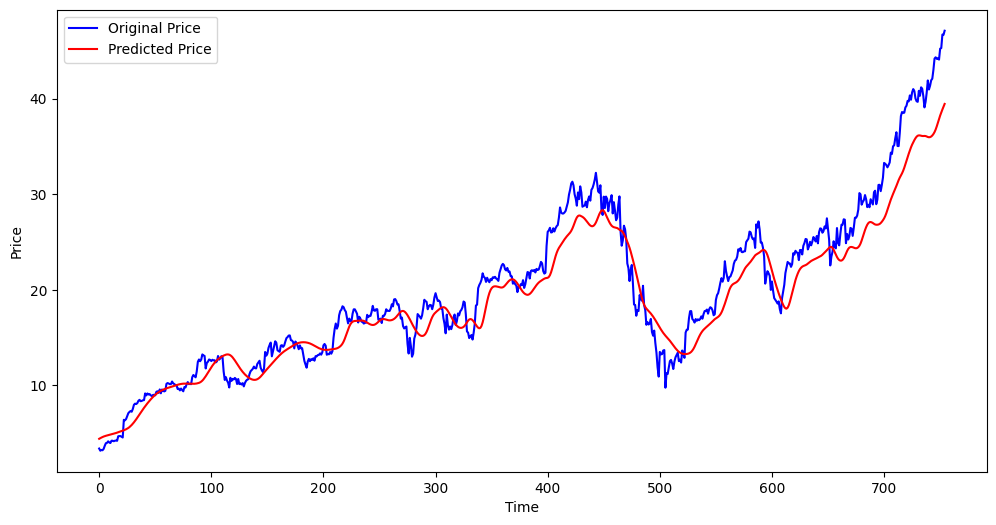

In [56]:
plt.figure(figsize=(12,6)) #figsize is for resolution
plt.plot(y_test,'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()